<h1>Lesson 3. Classification: Credit worthiness from German bank</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/8/8e/Flag_map_of_Germany.svg" style="height:200px;">
  
  <p>In this exercise you will predict credit worthiness of custmers of a German bank (<a href="https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)">provided by Hans Hofmann from Univeristy of Hamburg</a>). The data we will be working with here is a reduced version of the full dataset.</p>
<p>The following features are available for the 1000-row dataset:</p>
<ul>
<li>Class: Credit worthiness (what you are trying to predict)</li>
<li>Duration: Duration of the credit (in months) </li>
<li>Amount: Amount of money asked for (in Deutche Marks (DM))</li>
<li>InstallmentRatePercentage: Installment rate in percentage of disposable income </li>
<li>ResidenceDuration: Number of years at current residence</li>
<li>Age: Person's age</li>
<li>NumberExistingCredits: Number of credit accounts</li>
<li>NumberPeopleMaintenance: Number of people being liable to provide maintenance for the credit</li>
<li>Telephone: Is there a phone number associated with the customer name?  </li>
<li>ForeignWorker: Is the person a foreign worker?</li>
<li>CheckingAccountStatus: Amount of money in the checking account (in DM)<ul>
<li>CheckingAccountStatus.lt.0</li>
<li>CheckingAccountStatus.0.to.200</li>
<li>CheckingAccountStatus.gt.200</li>
</ul></li>
<li>CreditHistory: Past credit history<ul>
<li>CreditHistory.ThisBank.AllPaid</li>
<li>CreditHistory.PaidDuly</li>
<li>CreditHistory.Delay</li>
<li>CreditHistory.Critical</li>
</ul></li>
</ul>

<p>This dataset is available in <a href="http://caret.r-forge.r-project.org/">'caret'</a> library. Let's load it and see how it looks:</p>

In [1]:
import pandas as pd

# loading the training and test dataset
credit_train = pd.read_csv('credit_train.csv')
credit_test = pd.read_csv('credit_test.csv')

credit_train.head()

,Class,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,CheckingAccountStatus.lt.0,CheckingAccountStatus.0.to.200,CheckingAccountStatus.gt.200,CreditHistory.ThisBank.AllPaid,CreditHistory.PaidDuly,CreditHistory.Delay,CreditHistory.Critical
0,Good,6,1169,4,4,67,2,1,0,1,1,0,0,0,0,0,1
1,Bad,48,5951,2,2,22,1,1,1,1,0,1,0,0,1,0,0
2,Good,12,2096,2,3,49,1,2,1,1,0,0,0,0,0,0,1
3,Good,36,9055,2,4,35,1,2,0,1,0,0,0,0,1,0,0
4,Good,24,2835,3,4,53,1,1,1,1,0,0,0,0,1,0,0


<h3>Q.0. Write code to display the count of null values in each column<h3>

In [2]:
# From ainok@uw.edu
# Command:
print(credit_train.isnull().sum())
print(credit_test.isnull().sum())
# One sentance summary:
#

Class                             0
Duration                          0
Amount                            0
InstallmentRatePercentage         0
ResidenceDuration                 0
Age                               0
NumberExistingCredits             0
NumberPeopleMaintenance           0
Telephone                         0
ForeignWorker                     0
CheckingAccountStatus.lt.0        0
CheckingAccountStatus.0.to.200    0
CheckingAccountStatus.gt.200      0
CreditHistory.ThisBank.AllPaid    0
CreditHistory.PaidDuly            0
CreditHistory.Delay               0
CreditHistory.Critical            0
dtype: int64
Class                             0
Duration                          0
Amount                            0
InstallmentRatePercentage         0
ResidenceDuration                 0
Age                               0
NumberExistingCredits             0
NumberPeopleMaintenance           0
Telephone                         0
ForeignWorker                     0
CheckingAccount

<h3>Q.1. How does the distribution of credit amount look like? (Use a histogram plot to answer this question)</h3>

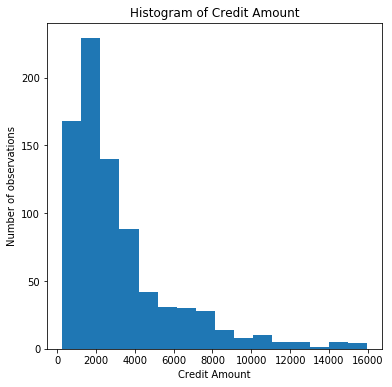

In [3]:
# Put the command (or commands) here that would give an answer to the above question.

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(6,6)) 
ax = fig.gca() 
credit_train["Amount"].plot.hist(ax = ax, bins = 16) 
ax.set_title('Histogram of ' + 'Credit Amount') 
ax.set_xlabel("Credit Amount") 
ax.set_ylabel('Number of observations')
plt.show()

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


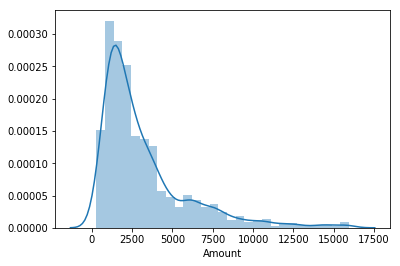

In [4]:
# from arnabch@uw.edu
# Put the command (or commands) here that would give an answer to the above question.
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

sn.distplot(credit_train['Amount'])
plt.show()

<h3>Q.2. Can you generate a plot that shows CreditHistory.Critical vs. Credit Worthiness for the training data. Can you comment whether person with critical credit history is more credit worthy?</h3> 

Count of Good vs. Bad Credit by Critical Credit History:
Without breaking the data further down, it appears that people WITHOUT a Critical Credit History (chart on the left) are
LESS credit worthy (ie. the ratio of Bad to Good credit is higher) than those who HAVE a Critical Credit History (chart on the right).


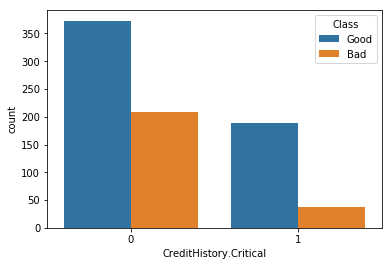

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

print("Count of Good vs. Bad Credit by Critical Credit History:")
ax = sns.countplot(x="CreditHistory.Critical", hue="Class", data=credit_train)
print("Without breaking the data further down, it appears that people WITHOUT a Critical Credit History (chart on the left) are")
print("LESS credit worthy (ie. the ratio of Bad to Good credit is higher) than those who HAVE a Critical Credit History (chart on the right).")

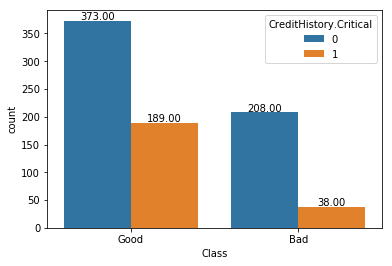

In [6]:
# Alternate way of viewing the data
# Command:
import seaborn as sns
ax = sns.countplot(x="Class", hue="CreditHistory.Critical", data=credit_train)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 4), textcoords = 'offset points')
# One sentence summary:
# Yes , a person with critical credit history is more credit worthy as the numbers of good 'Class' matches 
# with high number of 'CreditHistory.Critical'

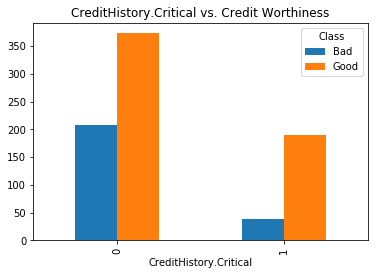

In [7]:
# From kannans@uw.edu

pd.crosstab(credit_train['CreditHistory.Critical'], credit_train['Class']).plot(kind='bar',title="CreditHistory.Critical vs. Credit Worthiness");



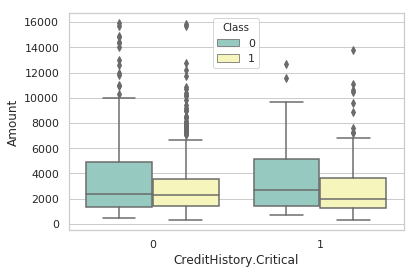

In [18]:
# From sreenik@uw.edu

import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x="CreditHistory.Critical", y="Amount", hue="Class",
                data=credit_train, palette="Set3")
##ax = sns.swarmplot(x="CreditHistory.Critical", y="Amount", hue="Class",
  #              data=credit_train, color=".25")
#If amount goes higher , credit history critical 

<h3>Q.3. Binarize the y output for e.g. 0 = 'bad' credit; 1 = 'good' credit. </h3>

In [8]:
cleanup = {"Class":     {"Bad": 0, "Good": 1}}
credit_train.replace(cleanup, inplace=True)
print(credit_train["Class"].head())
credit_test.replace(cleanup, inplace=True)

0    1
1    0
2    1
3    1
4    1
Name: Class, dtype: int64


<h3>Q.4. Generate a logistic regression model that uses the one predictor CreditHistory.Critical. Provide a summary of the model. </h3>

In [9]:
import numpy as np
from sklearn.linear_model import LogisticRegression

x_train = np.array(credit_train["CreditHistory.Critical"]).reshape(-1,1)
y_train = np.array(credit_train["Class"]).reshape(-1,1)
log_mod = LogisticRegression(fit_intercept=False)
print(log_mod.fit(x_train, y_train))

print(log_mod.intercept_)
print(log_mod.coef_)
print()
probabilities = log_mod.predict_proba(x_train)
print(probabilities[:10,:])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
0.0
[[1.55576979]]

[[0.17425449 0.82574551]
 [0.5        0.5       ]
 [0.17425449 0.82574551]
 [0.5        0.5       ]
 [0.5        0.5       ]
 [0.5        0.5       ]
 [0.17425449 0.82574551]
 [0.5        0.5       ]
 [0.5        0.5       ]
 [0.17425449 0.82574551]]


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
# Alternate library / methods From garethb@uw.edu
import statsmodels.discrete.discrete_model as sm
logit = sm.Logit(credit_train['Class'].values, credit_train['CreditHistory.Critical'].values)
# fit the model
result = logit.fit()
print(result.summary2())

# look at the confidence interval of each coeffecient
print(result.conf_int())

Optimization terminated successfully.
         Current function value: 0.625326
         Iterations 5
                         Results: Logit
Model:              Logit            No. Iterations:   5.0000   
Dependent Variable: y                Pseudo R-squared: -0.017   
Date:               2019-11-18 15:54 AIC:              1012.5274
No. Observations:   808              BIC:              1017.2220
Df Model:           0                Log-Likelihood:   -505.26  
Df Residuals:       807              LL-Null:          -496.59  
Converged:          1.0000           Scale:            1.0000   
-------------------------------------------------------------------
         Coef.     Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
x1       1.6042      0.1778    9.0231    0.0000    1.2557    1.9526

[[1.25571258 1.95260913]]


In [11]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score

y_pred_Logit = result.predict(credit_test['CreditHistory.Critical'].values)
#print(y_pred)
y_pred_Logit = (y_pred_Logit > 0.5) 

print(confusion_matrix(credit_test['Class'].values, y_pred_Logit))

[[42 12]
 [84 54]]


<h3>Q.5. Using the developed model, predict the values in credit_test and use it to output a confusion matrix.</h3>

In [12]:

from sklearn.metrics import confusion_matrix

x_test = np.array(credit_test["CreditHistory.Critical"]).reshape(-1,1)
y_test = np.array(credit_test["Class"]).reshape(-1,1)
y_pred = log_mod.predict(x_test).reshape(-1,1)

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)


[[42 12]
 [84 54]]


<h3>Q.6. What is the accuracy of the model on the test data?</h3>

In [13]:
# Command that outputs acccuracy
# From arkiel@uw.edu

import sklearn.metrics as sklm
def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])
    
print_metrics(y_test, y_pred) 
print("The accuracy of the model is 0.5 (ie. exactly like a coin toss).")

                 Confusion matrix
                 Score positive    Score negative
Actual positive        42                12
Actual negative        84                54

Accuracy  0.50
 
           Positive      Negative
Num case       54           138
Precision    0.33          0.82
Recall       0.78          0.39
F1           0.47          0.53
The accuracy of the model is 0.5 (ie. exactly like a coin toss).


<h3>Q.7. Generate the ROC curve.</h3>

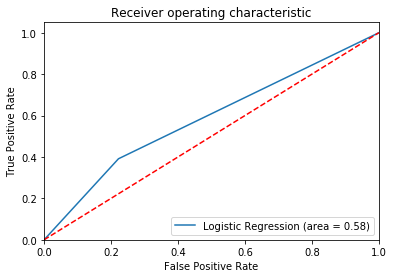

In [14]:
# From arkiel@uw.edu
# Command(s):
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

def plot_auc(labels_test, features_test):
    logit_roc_auc = sklm.roc_auc_score(labels_test, log_mod.predict(features_test))
    fpr, tpr, thresholds = sklm.roc_curve(labels_test, log_mod.predict_proba(features_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

plot_auc(y_test, x_test)

<h3>Q.8. What is the ROC AUC of the model on the test data?</h3>

In [15]:
print("The ROC AUC of the model on the test data is 0.58")

The ROC AUC of the model on the test data is 0.58


<h3>Q.9. Calculate LDA model on credit_train.</h3>

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
y_pred = lda.fit(x_train, y_train).predict(x_test)

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<h3>Q.10. What is the accuracy of the new model?</h3>

In [17]:
import sklearn.metrics as sklm
def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])
    
print_metrics(y_test, y_pred) 


                 Confusion matrix
                 Score positive    Score negative
Actual positive         0                54
Actual negative         0               138

Accuracy  0.72
 
           Positive      Negative
Num case       54           138
Precision    0.00          0.72
Recall       0.00          1.00
F1           0.00          0.84


/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<h3>Q.11. Create a new text cell in your Notebook: Complete a 50-100 word summary 
    (or short description of your thinking in applying this week's learning to the solution) 
     of your experience in this assignment. Include:
<br>                                                                       
What was your incoming experience with this model, if any?
what steps you took, what obstacles you encountered.
how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?)
This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work.
</h3>